<a href="https://colab.research.google.com/github/tomislavpavloski/VNP/blob/main/DS_23_24_standardni_seminarski_raboti_tema_10_201055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Comparison and Aggregation from Setec and Tehnomarket

**Project Overview:**  
Collecting and comparing laptop prices from Setec and Tehnomarket to aggregate identical products and analyze price differences.


| **Project title**          | **Description**                                                                                                                                                            |
|----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **General**       | Да се соберат податоци за цените на еден ист продукт од продавница налик ananas и да се направи агрегација на продукти кои се исти со цел споредба на цена |
| **Concrete**     | Laptop Price Comparison and Aggregation from Setec and Tehnomarket |



# Setec laptops

Web scraping - Setec laptops
1. **Import Libraries**: Imports necessary libraries for web scraping and HTML parsing.
2. **Define URL and Headers**: Sets the base URL and headers for HTTP requests.
3. **Parse Page Function**: Defines a function to scrape and extract laptop details from a single page.
4. **Iterate Pages**: Iterates through multiple pages to scrape laptop data.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for Setec laptops
base_url = "https://setec.mk/laptops/notebooks?page="

# Function to get laptop data from a single page
def get_laptop_data(page_number):
    url = base_url + str(page_number)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Use the provided CSS selector to find the product items
    products = soup.find_all('div', class_='product clearfix product-hover')

    laptop_data = []

    for product in products:
        # Extracting the laptop name
        name_element = product.find('div', class_='name')
        name = name_element.get_text(strip=True) if name_element else "N/A"

        # Extracting the regular price of the laptop
        regular_price_element = product.find('span', class_='price-old-new')
        regular_price = regular_price_element.get_text(strip=True) if regular_price_element else "N/A"

        # Extracting the discounted price of the laptop
        discount_price_element = product.find('span', class_='price-new-new')
        discount_price = discount_price_element.get_text(strip=True) if discount_price_element else "N/A"

        # Extracting the laptop code (not present in Tehnomarket but added here for consistency)
        laptop_code_element = product.find('div', class_='shifra')
        laptop_code = laptop_code_element.get_text(strip=True) if laptop_code_element else "N/A"

        laptop_data.append({
            'name': name,
            'regular_price': regular_price,
            'discount_price': discount_price,
            'laptop_code': laptop_code
        })

    return laptop_data

# Main function to scrape data from all pages
def scrape_all_pages(total_pages):
    all_laptop_data = []

    for page_number in range(1, total_pages + 1):
        page_data = get_laptop_data(page_number)
        all_laptop_data.extend(page_data)

    return all_laptop_data

# Scrape data from all 11 pages
total_pages = 11
laptop_data = scrape_all_pages(total_pages)

# Print the data
for data in laptop_data:
    print(f"Laptop Name Setec: {data['name']}")
    print(f"Regular Price: {data['regular_price']}")
    print(f"Discounted Price: {data['discount_price']}")
    print(f"Laptop Code: {data['laptop_code']}")
    print('---')

# Create a DataFrame
df_setec = pd.DataFrame(laptop_data)

# Print the DataFrame
print(df_setec)

# Save to a CSV file
df_setec.to_csv('setec_laptops.csv', index=False)


Laptop Name Setec: Лаптоп HP 250 G8
Regular Price: 13,999 Ден.
Discounted Price: 12,999 Ден.
Laptop Code: Шифра: 51644
---
Laptop Name Setec: Лаптоп ASUS E510MA-EJ1462 (Dreamy White)
Regular Price: 16,999 Ден.
Discounted Price: 13,999 Ден.
Laptop Code: Шифра: 58347
---
Laptop Name Setec: Лаптоп LENOVO  IdeaPad 3 15ITL6 ( PLATINUM GRAY )
Regular Price: 17,999 Ден.
Discounted Price: 15,995 Ден.
Laptop Code: Шифра: 50840
---
Laptop Name Setec: Лаптоп ACER Aspire 3 A315-510P-35FD ( Silver ) - Процесор  Intel Core i3-N305 (6M Cache
Regular Price: 18,999 Ден.
Discounted Price: 15,999 Ден.
Laptop Code: Шифра: 57455
---
Laptop Name Setec: Лаптоп ASUS X515EA-BQ312 (Slate Grey)
Regular Price: 17,999 Ден.
Discounted Price: 15,999 Ден.
Laptop Code: Шифра: 53184
---
Laptop Name Setec: Лаптоп HP  15s-eq1060nia (Jet Black)
Regular Price: 18,999 Ден.
Discounted Price: 16,995 Ден.
Laptop Code: Шифра: 50468
---
Laptop Name Setec: Лаптоп HP 15s-eq1000nm (Jet Black)
Regular Price: 18,999 Ден.
Discounted P

Display DataFrame: Displays the DataFrame containing scraped data (Setec)


In [ ]:
from IPython.display import display
import pandas as pd

df_setec.columns = ['Laptop Name Setec', 'Laptop Code', 'Regular Price', 'Discounted Price']

# Display the DataFrame
display(df_setec)


,Laptop Name Setec,Laptop Code,Regular Price,Discounted Price
0,Лаптоп HP 250 G8,"13,999 Ден.","12,999 Ден.",Шифра: 51644
1,Лаптоп ASUS E510MA-EJ1462 (Dreamy White),"16,999 Ден.","13,999 Ден.",Шифра: 58347
2,Лаптоп LENOVO IdeaPad 3 15ITL6 ( PLATINUM GRAY ),"17,999 Ден.","15,995 Ден.",Шифра: 50840
3,Лаптоп ACER Aspire 3 A315-510P-35FD ( Silver )...,"18,999 Ден.","15,999 Ден.",Шифра: 57455
4,Лаптоп ASUS X515EA-BQ312 (Slate Grey),"17,999 Ден.","15,999 Ден.",Шифра: 53184
...,...,...,...,...
332,Лаптоп Apple MacBook Pro 14 ( Space Black ),"254,999 Ден.","234,999 Ден.",Шифра: 57089
333,Лаптоп Apple MacBook Pro 16 ( Silver ),"269,999 Ден.","246,999 Ден.",Шифра: 57047
334,Лаптоп Apple MacBook Pro 16 ( SPACE BLACK ),"269,999 Ден.","246,999 Ден.",Шифра: 57048
335,Лаптоп Apple MacBook Pro 16 ( Silver ),"306,999 Ден.","283,999 Ден.",Шифра: 57049


In [ ]:
# Remove "Лаптоп" from the beginning of the Laptop Name column
df_setec['Laptop Name Setec'] = df_setec['Laptop Name Setec'].str.replace(r'^Лаптоп\s*', '', regex=True)
df_setec

,Laptop Name Setec,Laptop Code,Regular Price,Discounted Price
0,HP 250 G8,"13,999 Ден.","12,999 Ден.",Шифра: 51644
1,ASUS E510MA-EJ1462 (Dreamy White),"16,999 Ден.","13,999 Ден.",Шифра: 58347
2,LENOVO IdeaPad 3 15ITL6 ( PLATINUM GRAY ),"17,999 Ден.","15,995 Ден.",Шифра: 50840
3,ACER Aspire 3 A315-510P-35FD ( Silver ) - Проц...,"18,999 Ден.","15,999 Ден.",Шифра: 57455
4,ASUS X515EA-BQ312 (Slate Grey),"17,999 Ден.","15,999 Ден.",Шифра: 53184
...,...,...,...,...
332,Apple MacBook Pro 14 ( Space Black ),"254,999 Ден.","234,999 Ден.",Шифра: 57089
333,Apple MacBook Pro 16 ( Silver ),"269,999 Ден.","246,999 Ден.",Шифра: 57047
334,Apple MacBook Pro 16 ( SPACE BLACK ),"269,999 Ден.","246,999 Ден.",Шифра: 57048
335,Apple MacBook Pro 16 ( Silver ),"306,999 Ден.","283,999 Ден.",Шифра: 57049


In [ ]:
# Remove "Ден." from the beginning of the Regular Price and Discounted Price columns
df_setec['Regular Price'] = df_setec['Regular Price'].str.replace(r'\s*Ден\.$', '', regex=True)
df_setec['Discounted Price'] = df_setec['Discounted Price'].str.replace(r'\s*Ден\.$', '', regex=True)
df_setec

,Laptop Name Setec,Laptop Code,Regular Price,Discounted Price
0,HP 250 G8,"13,999 Ден.","12,999",Шифра: 51644
1,ASUS E510MA-EJ1462 (Dreamy White),"16,999 Ден.","13,999",Шифра: 58347
2,LENOVO IdeaPad 3 15ITL6 ( PLATINUM GRAY ),"17,999 Ден.","15,995",Шифра: 50840
3,ACER Aspire 3 A315-510P-35FD ( Silver ) - Проц...,"18,999 Ден.","15,999",Шифра: 57455
4,ASUS X515EA-BQ312 (Slate Grey),"17,999 Ден.","15,999",Шифра: 53184
...,...,...,...,...
332,Apple MacBook Pro 14 ( Space Black ),"254,999 Ден.","234,999",Шифра: 57089
333,Apple MacBook Pro 16 ( Silver ),"269,999 Ден.","246,999",Шифра: 57047
334,Apple MacBook Pro 16 ( SPACE BLACK ),"269,999 Ден.","246,999",Шифра: 57048
335,Apple MacBook Pro 16 ( Silver ),"306,999 Ден.","283,999",Шифра: 57049


# Tehnomarket laptops



Web scraping - Tehnomarket
1. **Import Libraries**: Imports libraries for web scraping and HTML parsing.
2. **Define URL and Headers**: Defines the base URL and HTTP headers for web scraping.
3. **Parse Page Function**: Defines a function for scraping and extracting laptop details from a single page.
4. **Iterate Pages**: Iterates through pages to scrape laptop data from multiple pages.

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to get laptop data from a single page
def get_laptop_data(page_number):
    url = f'https://www.tehnomarket.com.mk/category/4003/laptopi#page/{page_number}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Use the provided CSS selector to find the product items
    products = soup.select('#category > div > div.box-content > div > div > div.products > ul > li > div')

    laptop_data = []

    for product in products:
        # Extracting the laptop name
        name_element = product.select_one('div.product-name a')
        name = name_element.get_text(strip=True) if name_element else "N/A"

        # Extracting the regular price of the laptop
        regular_price_element = product.select_one('div.product-price .nm')
        regular_price = regular_price_element.get_text(strip=True) if regular_price_element else "N/A"

        # Extracting the discounted price of the laptop
        discount_price_element = product.select_one('div.smart-products .nm')
        discount_price = discount_price_element.get_text(strip=True) if discount_price_element else "N/A"

        # Extracting the product URL
        url_element = product.select_one('a[href]')
        product_url = url_element['href'] if url_element else "N/A"

        laptop_data.append({
            'name': name,
            'regular_price': regular_price,
            'discount_price': discount_price,
            'url': product_url
        })

    return laptop_data

# Main function to scrape data from all pages
def scrape_all_pages(total_pages):
    all_laptop_data = []

    for page_number in range(1, total_pages + 1):
        page_data = get_laptop_data(page_number)
        all_laptop_data.extend(page_data)

    return all_laptop_data

# Scrape data from all 4 pages
total_pages = 4
laptop_data = scrape_all_pages(total_pages)

# Print the data
for data in laptop_data:
    print(f"Laptop Name Tehnomarket: {data['name']}")
    print(f"Regular Price: {data['regular_price']}")
    print(f"Discounted Price: {data['discount_price']}")
    print(f"URL: {data['url']}")
    print('---')

# Create a DataFrame
df_tehnomarket = pd.DataFrame(laptop_data)

# Print the DataFrame
print(df_tehnomarket)

# Save to a CSV file
df_setec.to_csv('tehnomarket_laptops.csv', index=False)


Laptop Name Tehnomarket: Notebook Acer EX215 N4120 4GB/256GB SSD/GigaLAN/15.6" FullHD IPS/DOS/B
Regular Price: 16,799
Discounted Price: 14,599
URL: https://www.tehnomarket.com.mk/product/29388125/notebook-acer-ex215-n4120-4gb256gb-ssdgigalan156-fullhd-ipsdosblack
---
Laptop Name Tehnomarket: Notebook Acer EX215 N5100 4GB/256GB SSD/15.6" FullHD IPS/GigaLAN/DOS/B
Regular Price: 16,870
Discounted Price: 14,799
URL: https://www.tehnomarket.com.mk/product/29389640/notebook-acer-ex215-n5100-4gb256gb-ssd156-fullhd-ipsgigalandosblack
---
Laptop Name Tehnomarket: LENOVO IP3 6305 8GB/256GB/15.6" FULLHD AD 250N/DOS/ARCTICGRAY
Regular Price: 19,299
Discounted Price: 14,799
URL: https://www.tehnomarket.com.mk/product/29395579/lenovo-ip3-6305-8gb256gb156-fullhd-ad-250ndosarcticgray
---
Laptop Name Tehnomarket: HP 15S RYZEN3 5300U 4GB/256GB/GIGALAN/15.6" FULLHD/DOS
Regular Price: 19,829
Discounted Price: 17,389
URL: https://www.tehnomarket.com.mk/product/29393804/hp-15s-ryzen3-5300u-4gb256gbgigalan15

Display DataFrame: Displays the DataFrame containing scraped data (Tehnomarket)

In [ ]:
from IPython.display import display
import pandas as pd

df_tehnomarket.columns = ['Laptop Name Tehnomarket', 'Regular Price', 'Discounted Price', 'URL']

display(df_tehnomarket)

,Laptop Name Tehnomarket,Regular Price,Discounted Price,URL
0,Notebook Acer EX215 N4120 4GB/256GB SSD/GigaLA...,"16,799","14,599",https://www.tehnomarket.com.mk/product/2938812...
1,"Notebook Acer EX215 N5100 4GB/256GB SSD/15.6"" ...","16,870","14,799",https://www.tehnomarket.com.mk/product/2938964...
2,"LENOVO IP3 6305 8GB/256GB/15.6"" FULLHD AD 250N...","19,299","14,799",https://www.tehnomarket.com.mk/product/2939557...
3,"HP 15S RYZEN3 5300U 4GB/256GB/GIGALAN/15.6"" FU...","19,829","17,389",https://www.tehnomarket.com.mk/product/2939380...
4,"LENOVO IP3 I3-1115G4 8GB/256GB/15.6"" FULL HD/T...","19,999","17,999",https://www.tehnomarket.com.mk/product/2939913...
...,...,...,...,...
123,HP 15 RYZEN 3 7320U/8GB/512GB/15.6'' FULL HD I...,"26,499","22,599",https://www.tehnomarket.com.mk/product/2939802...
124,Notebook Asus VivoBook R564JA i3-1005G1/4GB/12...,"26,999","21,499",https://www.tehnomarket.com.mk/product/2929209...
125,Notebook Acer Aspire A315-23 Ryzen3 3250U 8GB/...,"26,999","18,999",https://www.tehnomarket.com.mk/product/2939515...
126,Notebook Acer EX215-23-R3KW Ryzen5 7520U 8GB/5...,"26,999","20,999",https://www.tehnomarket.com.mk/product/2939945...


# Setec & Tehnomarket laptops

In [ ]:
# Check the column names in each DataFrame
print("Columns in df_setec:", df_setec.columns)
print("Columns in df_tehnomarket:", df_tehnomarket.columns)

Columns in df_setec: Index(['Laptop Name Setec', 'Laptop Code', 'Regular Price',
       'Discounted Price'],
      dtype='object')
Columns in df_tehnomarket: Index(['Laptop Name Tehnomarket', 'Regular Price', 'Discounted Price', 'URL'], dtype='object')


Combine and Save DataFrames: Concatenates the DataFrames and saves the combined result to a CSV file for preview

In [ ]:
# Concatenate the dataframes
combined_df = pd.concat([df_setec, df_tehnomarket], ignore_index=True)

# Save to a CSV file
combined_df.to_csv('combined_laptops.csv', index=False)

combined_df

,Laptop Name Setec,Laptop Code,Regular Price,Discounted Price,Laptop Name Tehnomarket,URL
0,HP 250 G8,"13,999 Ден.","12,999",Шифра: 51644,NaN,NaN
1,ASUS E510MA-EJ1462 (Dreamy White),"16,999 Ден.","13,999",Шифра: 58347,NaN,NaN
2,LENOVO IdeaPad 3 15ITL6 ( PLATINUM GRAY ),"17,999 Ден.","15,995",Шифра: 50840,NaN,NaN
3,ACER Aspire 3 A315-510P-35FD ( Silver ) - Проц...,"18,999 Ден.","15,999",Шифра: 57455,NaN,NaN
4,ASUS X515EA-BQ312 (Slate Grey),"17,999 Ден.","15,999",Шифра: 53184,NaN,NaN
...,...,...,...,...,...,...
460,NaN,NaN,"26,499","22,599",HP 15 RYZEN 3 7320U/8GB/512GB/15.6'' FULL HD I...,https://www.tehnomarket.com.mk/product/2939802...
461,NaN,NaN,"26,999","21,499",Notebook Asus VivoBook R564JA i3-1005G1/4GB/12...,https://www.tehnomarket.com.mk/product/2929209...
462,NaN,NaN,"26,999","18,999",Notebook Acer Aspire A315-23 Ryzen3 3250U 8GB/...,https://www.tehnomarket.com.mk/product/2939515...
463,NaN,NaN,"26,999","20,999",Notebook Acer EX215-23-R3KW Ryzen5 7520U 8GB/5...,https://www.tehnomarket.com.mk/product/2939945...


Clean DataFrame: Removes unnecessary columns and displays the cleaned DataFrame

In [ ]:
df_cleaned = combined_df.drop(columns=['Laptop Code', 'Discounted Price', 'URL'])

# Display the cleaned DataFrame
print(df_cleaned)

df_cleaned

                                     Laptop Name Setec Regular Price  \
0                                            HP 250 G8        12,999   
1                    ASUS E510MA-EJ1462 (Dreamy White)        13,999   
2           LENOVO  IdeaPad 3 15ITL6 ( PLATINUM GRAY )        15,995   
3    ACER Aspire 3 A315-510P-35FD ( Silver ) - Проц...        15,999   
4                       ASUS X515EA-BQ312 (Slate Grey)        15,999   
..                                                 ...           ...   
460                                                NaN        26,499   
461                                                NaN        26,999   
462                                                NaN        26,999   
463                                                NaN        26,999   
464                                                NaN        27,999   

                               Laptop Name Tehnomarket  
0                                                  NaN  
1                    

,Laptop Name Setec,Regular Price,Laptop Name Tehnomarket
0,HP 250 G8,"12,999",NaN
1,ASUS E510MA-EJ1462 (Dreamy White),"13,999",NaN
2,LENOVO IdeaPad 3 15ITL6 ( PLATINUM GRAY ),"15,995",NaN
3,ACER Aspire 3 A315-510P-35FD ( Silver ) - Проц...,"15,999",NaN
4,ASUS X515EA-BQ312 (Slate Grey),"15,999",NaN
...,...,...,...
460,NaN,"26,499",HP 15 RYZEN 3 7320U/8GB/512GB/15.6'' FULL HD I...
461,NaN,"26,999",Notebook Asus VivoBook R564JA i3-1005G1/4GB/12...
462,NaN,"26,999",Notebook Acer Aspire A315-23 Ryzen3 3250U 8GB/...
463,NaN,"26,999",Notebook Acer EX215-23-R3KW Ryzen5 7520U 8GB/5...


### **Matching and Cleaning Laptop Data for Price Comparison Between Setec and Tehnomarket** (code below)

1. **Import Necessary Libraries**:
   - Install and import the required libraries, including `fuzzywuzzy`, `rapidfuzz`, and `re`, for performing text matching and string manipulation.

2. **Extract Laptop Names**:
   - Convert the 'Laptop Name' columns from both the Setec and Tehnomarket datasets to lists for easier processing.

3. **Clean and Standardize Laptop Names**:
   - Clean each laptop name by removing non-alphanumeric characters and converting the text to lowercase to ensure consistent comparison.

4. **Find Best Matches**:
   - Use `fuzzywuzzy`'s `token_set_ratio` to find the best matching laptop names between Setec and Tehnomarket, considering only those with 80% or higher similarity.

5. **Retrieve Prices for Matched Laptops**:
   - For each matched laptop, retrieve the corresponding prices from the original DataFrame columns and store them in a new DataFrame.

6. **Clean Up Matched Data**:
   - Remove any rows with missing or NaN values and eliminate duplicate rows to ensure only unique entries are retained.

7. **Reorder and Reset Index**:
   - Reorder the rows of the resulting DataFrame for better presentation and reset the index to be sequential.

8. **Output the Final DataFrame**:
   - Display the cleaned and matched DataFrame, ready for further analysis or visualization.

This explanation provides a clear overview of the process involved in matching laptop names from two different datasets and cleaning the resulting data.

In [ ]:
!pip install fuzzywuzzy
!pip install rapidfuzz python-Levenshtein
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Access the 'Laptop Name' column
setec_laptops = df_cleaned['Laptop Name Setec'].astype(str).tolist()
tehnomarket_laptops = df_cleaned['Laptop Name Tehnomarket'].astype(str).tolist()

# Find matches and create a new DataFrame
matches = []
for laptop in setec_laptops:
    # Enhanced cleaning using regex
    cleaned_laptop = re.sub(r'[^a-zA-Z0-9 ]', '', laptop).lower().strip()

    # Find best matches using token_set_ratio for better accuracy
    match = process.extractOne(cleaned_laptop, tehnomarket_laptops, scorer=fuzz.token_set_ratio)

    # Consider matches with 80% or higher similarity
    if match[1] >= 80:
        # Use the original DataFrames with the 'Laptop Name' column to get the prices
        setec_price = combined_df.loc[combined_df['Laptop Name Setec'] == laptop, 'Regular Price'].values
        tehnomarket_price = combined_df.loc[combined_df['Laptop Name Tehnomarket'] == match[0], 'Regular Price'].values
        matches.append({
            'Laptop Name': laptop,
            'Setec Laptop Price': setec_price[0] if len(setec_price) > 0 else None,
            'Tehnomarket Laptop Price': tehnomarket_price[0] if len(tehnomarket_price) > 0 else None,
        })

df_matches = pd.DataFrame(matches)

# Remove rows with NaN or None values
df_matches = df_matches.dropna()

# Remove duplicates based on all columns to keep only unique entries
df_matches = df_matches.drop_duplicates()

# Reorder rows using iloc
df_matches = pd.concat([df_matches.iloc[:8], df_matches.iloc[9:], df_matches.iloc[8:9]])

# Reset index to be sequential
df_matches = df_matches.reset_index(drop=True)

print(df_matches)
df_matches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 11.2 MB/s eta 0:00:00
                    Laptop Name Setec Laptop Price Tehnomarket Laptop Price
0                     HP 250 G8             12,999                   26,499
1  LENOVO  V15 G2 ALC ( Black )             16,995                   20,499
2              DELL Vostro 3520             18,999                   22,999
3              DELL Vostro 3535             18,999                   22,999
4              DELL Vostro 3500             19,995                   22,999
5              DELL Vostro 3510             20,995                   22,999
6              DELL Vostro 3530             22,499                   22,999
7              DELL Vostro 3400             22,995                   22,999
8              DELL Vostro 5510             26,995                   22,999


,Laptop Name,Setec Laptop Price,Tehnomarket Laptop Price
0,HP 250 G8,"12,999","26,499"
1,LENOVO V15 G2 ALC ( Black ),"16,995","20,499"
2,DELL Vostro 3520,"18,999","22,999"
3,DELL Vostro 3535,"18,999","22,999"
4,DELL Vostro 3500,"19,995","22,999"
5,DELL Vostro 3510,"20,995","22,999"
6,DELL Vostro 3530,"22,499","22,999"
7,DELL Vostro 3400,"22,995","22,999"
8,DELL Vostro 5510,"26,995","22,999"


Converting Price Columns to Numerical Values

In [ ]:
import pandas as pd

# Define the conversion function
def convert_price(price_str):
    if isinstance(price_str, str): # Check if the value is a string
        try:
            # Remove commas and convert to float
            return float(price_str.replace(',', ''))
        except ValueError:
            return None
    else:
        return price_str # Return the value as is if it's not a string


# Apply the conversion function to both price columns
df_matches['Setec Laptop Price'] = df_matches['Setec Laptop Price'].apply(convert_price)
df_matches['Tehnomarket Laptop Price'] = df_matches['Tehnomarket Laptop Price'].apply(convert_price)

# Display the updated DataFrame
print(df_matches)

df_matches

                    Laptop Name  Setec Laptop Price  Tehnomarket Laptop Price
0                     HP 250 G8             12999.0                   26499.0
1  LENOVO  V15 G2 ALC ( Black )             16995.0                   20499.0
2              DELL Vostro 3520             18999.0                   22999.0
3              DELL Vostro 3535             18999.0                   22999.0
4              DELL Vostro 3500             19995.0                   22999.0
5              DELL Vostro 3510             20995.0                   22999.0
6              DELL Vostro 3530             22499.0                   22999.0
7              DELL Vostro 3400             22995.0                   22999.0
8              DELL Vostro 5510             26995.0                   22999.0


,Laptop Name,Setec Laptop Price,Tehnomarket Laptop Price
0,HP 250 G8,12999.0,26499.0
1,LENOVO V15 G2 ALC ( Black ),16995.0,20499.0
2,DELL Vostro 3520,18999.0,22999.0
3,DELL Vostro 3535,18999.0,22999.0
4,DELL Vostro 3500,19995.0,22999.0
5,DELL Vostro 3510,20995.0,22999.0
6,DELL Vostro 3530,22499.0,22999.0
7,DELL Vostro 3400,22995.0,22999.0
8,DELL Vostro 5510,26995.0,22999.0


# Overview of Aggregated Laptop Price Metrics and Visual Insights

Scatter Plot of Setec vs. Tehnomarket Laptop Prices

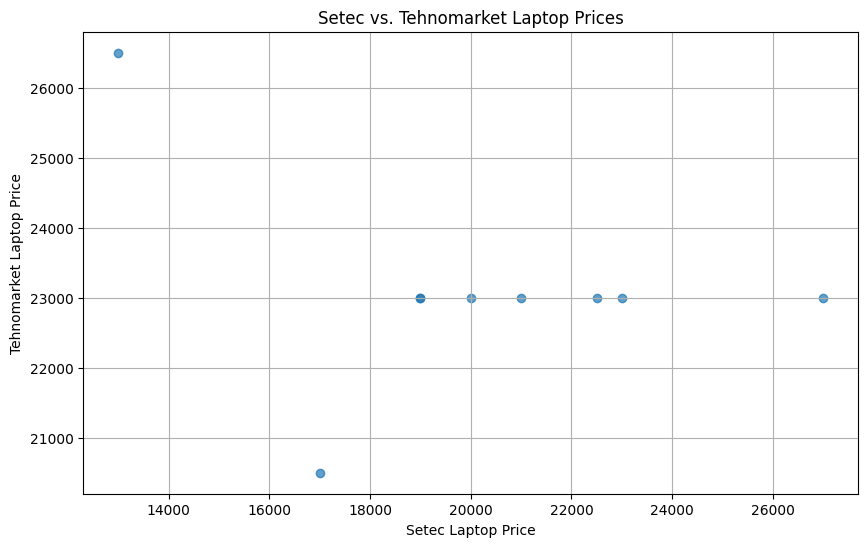

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_matches['Setec Laptop Price'], df_matches['Tehnomarket Laptop Price'], alpha=0.7)
plt.title('Setec vs. Tehnomarket Laptop Prices')
plt.xlabel('Setec Laptop Price')
plt.ylabel('Tehnomarket Laptop Price')
plt.grid(True)
plt.show()

Histogram of Price Differences Between Setec and Tehnomarket

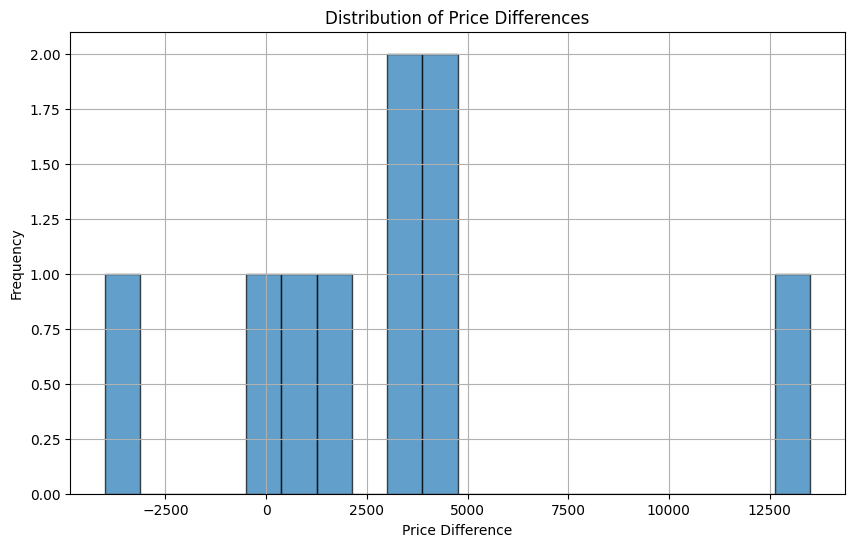

In [ ]:
df_matches['Price Difference'] = df_matches['Tehnomarket Laptop Price'] - df_matches['Setec Laptop Price']

plt.figure(figsize=(10, 6))
plt.hist(df_matches['Price Difference'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Box Plot of Laptop Prices from Setec and Tehnomarket


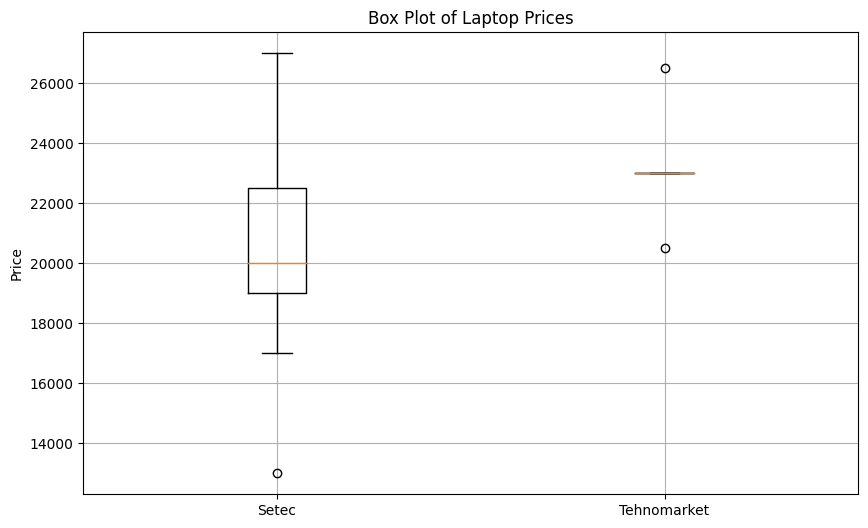

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_matches['Setec Laptop Price'].dropna(), df_matches['Tehnomarket Laptop Price'].dropna()],
            labels=['Setec', 'Tehnomarket'])
plt.title('Box Plot of Laptop Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Interactive Bubble Chart of Laptop Prices and Differences


In [ ]:
import plotly.express as px

# Create an interactive bubble chart
fig = px.scatter(df_matches,
                 x='Setec Laptop Price',
                 y='Tehnomarket Laptop Price',
                 size=df_matches['Price Difference'].abs(), # Use the absolute value of price difference for size
                 color='Price Difference',
                 hover_name='Laptop Name', # Changed to a valid column name
                 title='Interactive Bubble Chart of Laptop Prices and Differences')
fig.update_layout(xaxis_title='Setec Laptop Price',
                  yaxis_title='Tehnomarket Laptop Price')
fig.show()

Correlation Heatmap of Laptop Prices


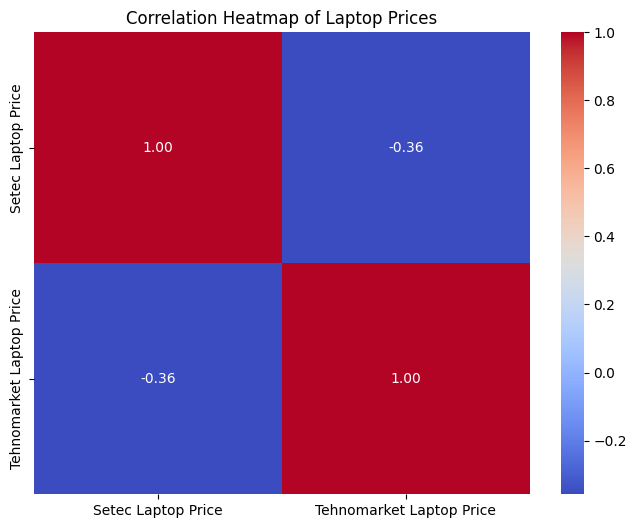

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for the price columns
correlation_matrix = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Laptop Prices')
plt.show()


Pair Plot of Laptop Prices and Price Differences

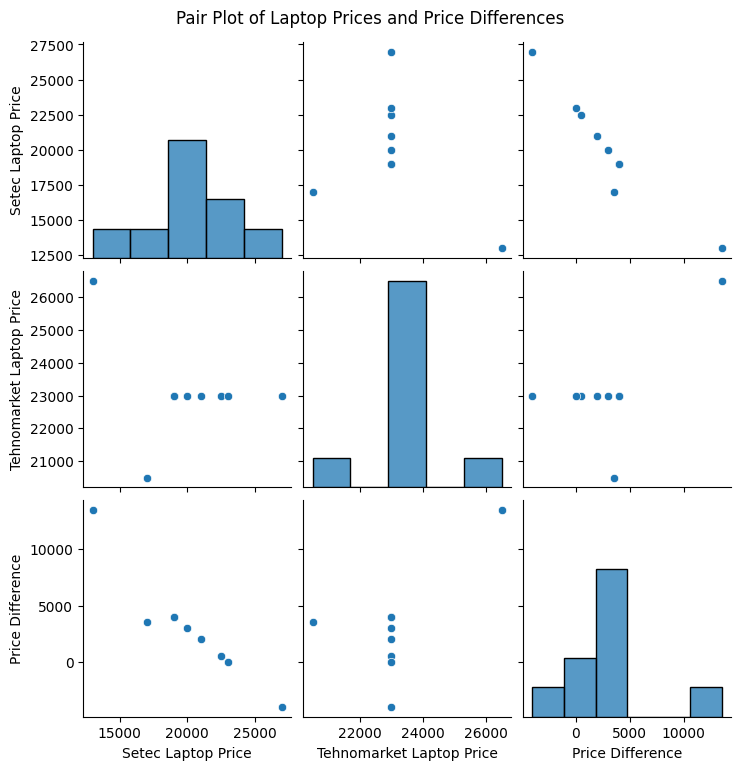

In [ ]:
import seaborn as sns

# Create a pair plot
sns.pairplot(df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price', 'Price Difference']])
plt.suptitle('Pair Plot of Laptop Prices and Price Differences', y=1.02)
plt.show()

Price Difference vs. Average Price Scatter Plot

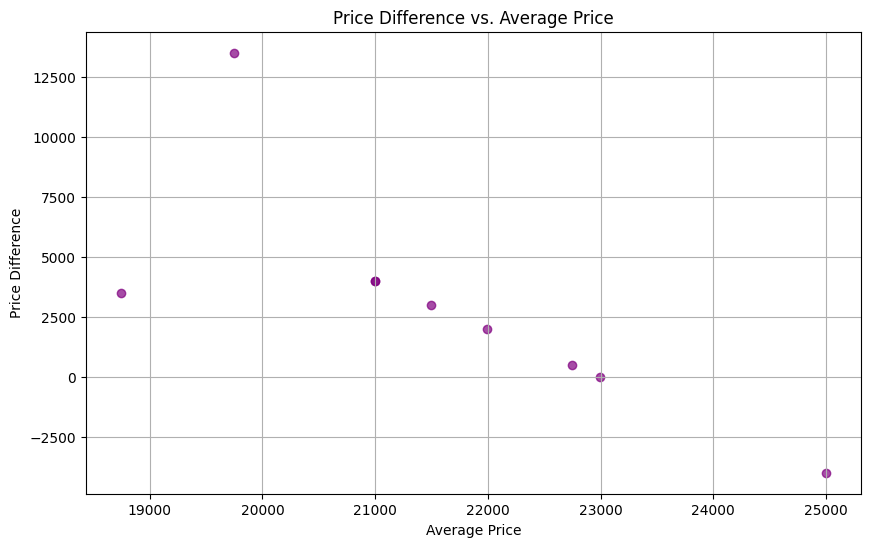

In [ ]:
# Calculate average price
df_matches['Average Price'] = (df_matches['Setec Laptop Price'] + df_matches['Tehnomarket Laptop Price']) / 2

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_matches['Average Price'], df_matches['Price Difference'], alpha=0.7, color='purple')
plt.title('Price Difference vs. Average Price')
plt.xlabel('Average Price')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

Parallel Coordinates Plot of Laptop Prices and Differences

In [ ]:
import plotly.express as px

# Create a parallel coordinates plot
fig = px.parallel_coordinates(df_matches,
                              dimensions=['Setec Laptop Price', 'Tehnomarket Laptop Price', 'Price Difference'],
                              color='Price Difference',
                              title='Parallel Coordinates Plot of Laptop Prices and Differences')

fig.show()


Interactive Pair Plot with Seaborn

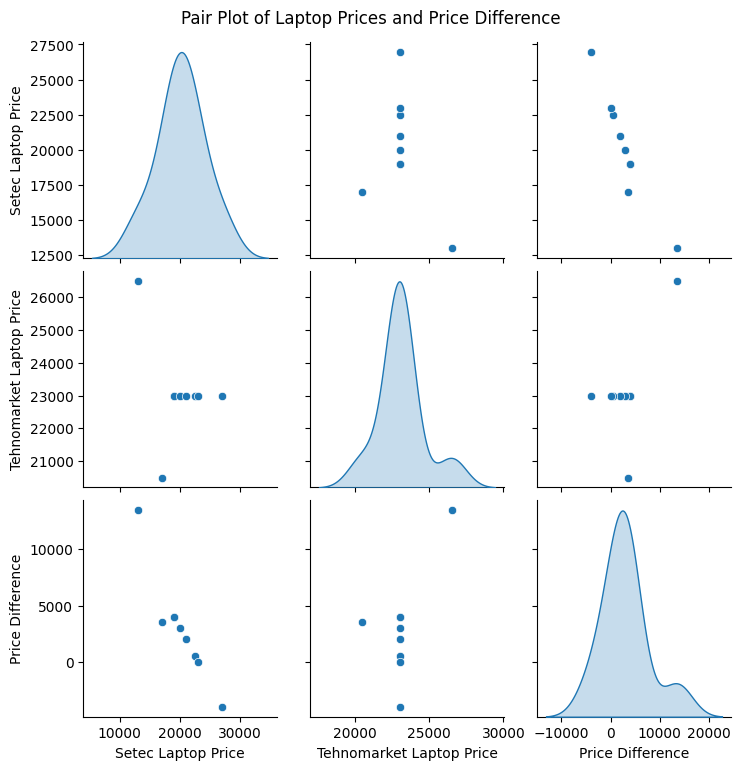

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with additional features
df_extended = df_matches.copy()
df_extended['Price Difference'] = df_extended['Tehnomarket Laptop Price'] - df_extended['Setec Laptop Price']

# Plot pairplot
sns.pairplot(df_extended[['Setec Laptop Price', 'Tehnomarket Laptop Price', 'Price Difference']], diag_kind='kde')
plt.suptitle('Pair Plot of Laptop Prices and Price Difference', y=1.02)
plt.show()


Correlation Analysis with Detailed Statistics

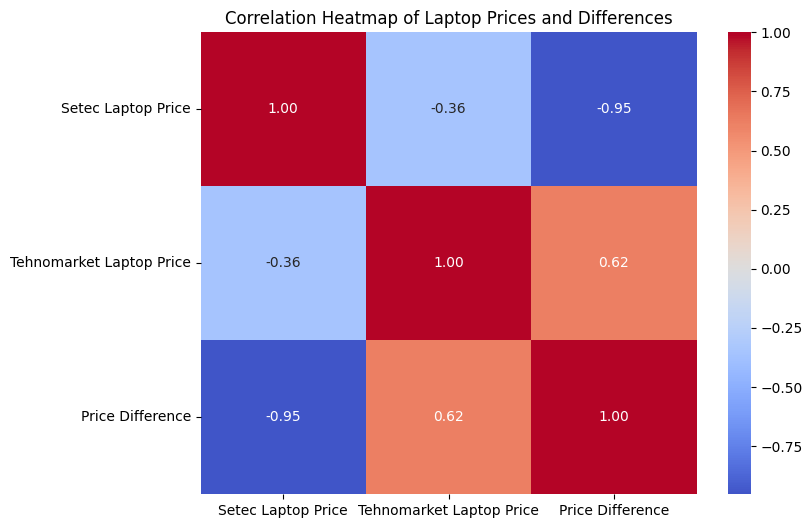

Correlation Matrix:
                           Setec Laptop Price  Tehnomarket Laptop Price  \
Setec Laptop Price                  1.000000                 -0.357885   
Tehnomarket Laptop Price           -0.357885                  1.000000   
Price Difference                   -0.953804                  0.621884   

                          Price Difference  
Setec Laptop Price               -0.953804  
Tehnomarket Laptop Price          0.621884  
Price Difference                  1.000000  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price', 'Price Difference']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap of Laptop Prices and Differences')
plt.show()

# Print correlation statistics
print("Correlation Matrix:\n", correlation_matrix)


Descriptive Statistics with Percentiles

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate descriptive statistics
desc_stats = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price']].describe().transpose()

# Calculate additional statistics
desc_stats['variance'] = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price']].var()
desc_stats['skewness'] = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price']].apply(lambda x: skew(x.dropna()))
desc_stats['kurtosis'] = df_matches[['Setec Laptop Price', 'Tehnomarket Laptop Price']].apply(lambda x: kurtosis(x.dropna()))

print(desc_stats)
desc_stats

                          count          mean          std      min      25%  \
Setec Laptop Price          9.0  20163.444444  3951.941014  12999.0  18999.0   
Tehnomarket Laptop Price    9.0  23110.111111  1516.117117  20499.0  22999.0   

                              50%      75%      max      variance  skewness  \
Setec Laptop Price        19995.0  22499.0  26995.0  1.561784e+07 -0.102828   
Tehnomarket Laptop Price  22999.0  22999.0  26499.0  2.298611e+06  0.803037   

                          kurtosis  
Setec Laptop Price       -0.110570  
Tehnomarket Laptop Price  1.747643  


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Setec Laptop Price,9.0,20163.444444,3951.941014,12999.0,18999.0,19995.0,22499.0,26995.0,1.561784e+07,-0.102828,-0.110570
Tehnomarket Laptop Price,9.0,23110.111111,1516.117117,20499.0,22999.0,22999.0,22999.0,26499.0,2.298611e+06,0.803037,1.747643


T-Test for Means

In [ ]:
from scipy.stats import ttest_ind

# Perform T-test
setec_prices = df_matches['Setec Laptop Price'].dropna()
tehnomarket_prices = df_matches['Tehnomarket Laptop Price'].dropna()

t_stat, p_value = ttest_ind(setec_prices, tehnomarket_prices, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


T-statistic: -2.0885
P-value: 0.0625
The difference in means is not statistically significant.


Predictive model to forecast future laptop prices based on historical data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
X = df_matches[['Setec Laptop Price']].dropna()
y = df_matches['Tehnomarket Laptop Price'].dropna()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error of the Model: {mse:.2f}")


Mean Squared Error of the Model: 86332.42
